In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of stocks
stocks = ['AAPL', 'AMZN', 'AVGO', 'GOOG', 'INTC', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2019-01-01'
end_date = '2025-03-03'

# Fetch all data at once
data = yf.download(stocks, start=start_date, end=end_date, interval='1d')

# Create a dictionary of DataFrames
close_dfs = {stock: pd.DataFrame(data['Close'][stock]).rename(columns={stock: 'Close'}) 
            for stock in stocks}

# Access individual DataFrames like this:
# close_dfs['AAPL'] for Apple
# close_dfs['MSFT'] for Microsoft, etc.

# Optional: Display one to verify
print(close_dfs['AAPL'])

[*********************100%***********************]  9 of 9 completed

                 Close
Date                  
2019-01-02   37.667183
2019-01-03   33.915257
2019-01-04   35.363071
2019-01-07   35.284355
2019-01-08   35.956989
...                ...
2025-02-24  247.100006
2025-02-25  247.039993
2025-02-26  240.360001
2025-02-27  237.300003
2025-02-28  241.839996

[1549 rows x 1 columns]


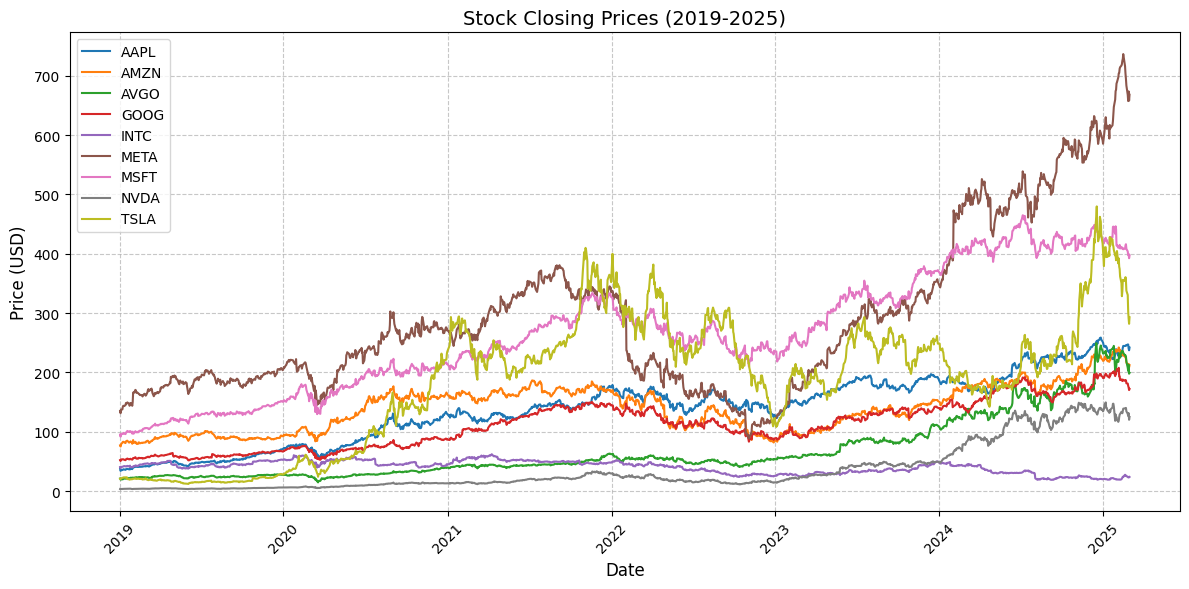

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size

# Plot each stock's closing price
for stock in stocks:
    plt.plot(close_dfs[stock].index, close_dfs[stock]['Close'], label=stock)

# Customize the plot
plt.title('Stock Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()  # Add legend to identify each line
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
# Define the Excel file name
excel_file = 'stock_prices_2019_2025.xlsx'

# Save to Excel with separate sheets for each stock
with pd.ExcelWriter(excel_file, engine='xlsxwriter', date_format='yyyy-mm-dd') as writer:
    for stock in stocks:
        # Format the index (dates) to 'YYYY-MM-DD' before saving
        close_dfs[stock].index = close_dfs[stock].index.strftime('%Y-%m-%d')
        
        # Write each stock's DataFrame to a separate sheet
        close_dfs[stock].to_excel(writer, sheet_name=stock, index=True)
        
        # Get the worksheet to apply formatting
        worksheet = writer.sheets[stock]
        
        # Set column widths
        worksheet.set_column('A:A', 15)  # Date column
        worksheet.set_column('B:B', 15)  # Close price column
        
        # Add a header format
        header_format = writer.book.add_format({
            'bold': True,
            'text_wrap': True,
            'valign': 'top',
            'fg_color': '#D7E4BC',
            'border': 1
        })
        
        # Write headers with format
        worksheet.write('A1', 'Date', header_format)
        worksheet.write('B1', 'Close Price', header_format)

# Print confirmation
print(f"Stock data has been saved to '{excel_file}'")

Stock data has been saved to 'stock_prices_2019_2025.xlsx'


In [19]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.
